In [7]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
imageDataSet = load_digits()

In [8]:
dir(imageDataSet)

['DESCR', 'data', 'images', 'target', 'target_names']

In [10]:
imageDataSet.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
imageDataSet.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
imageDataSet.target[0:6]

array([0, 1, 2, 3, 4, 5])

<Figure size 432x288 with 0 Axes>

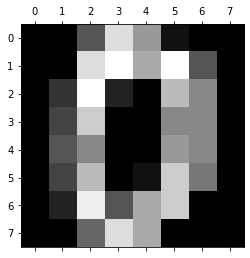

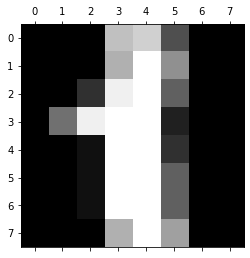

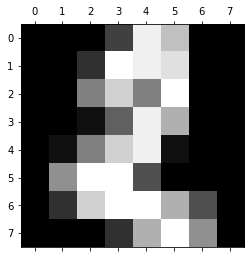

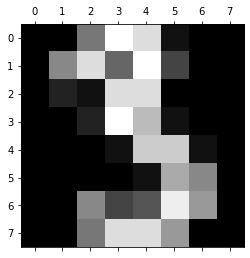

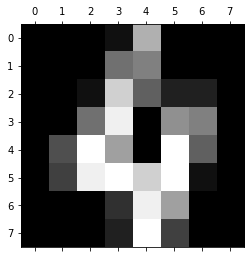

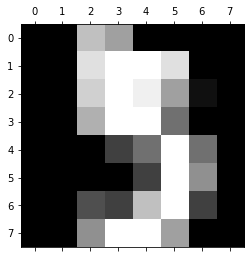

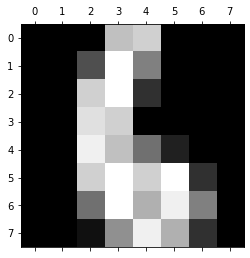

In [13]:
plt.gray() 
for i in range(7):
    plt.matshow(imageDataSet.images[i])

In [14]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test=train_test_split(imageDataSet.data,imageDataSet.target,test_size=0.2)

In [34]:
from sklearn.linear_model import LogisticRegression
dataModel=LogisticRegression(solver='lbfgs', multi_class='auto')

In [35]:
dataModel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
dataModel.score(X_test, y_test)

0.9583333333333334

In [39]:
dataModel.predict(imageDataSet.data[0:5])

array([0, 1, 2, 3, 4])

In [40]:
y_predicted = dataModel.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  1,  2],
       [ 0,  0, 30,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 35,  0,  1],
       [ 1,  1,  1,  0,  1,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 23]], dtype=int64)

Text(69.0, 0.5, 'Truth')

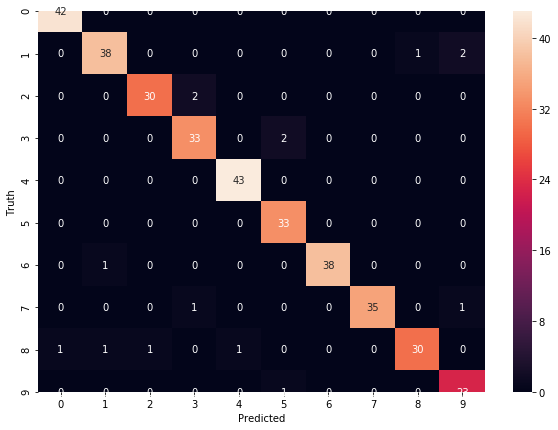

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')